In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_rischio(id):
    '''
    #Plot Risk zone
    '''
    ax = plt.figure().add_subplot(projection='3d')
    # Plot a sin curve using the x and y axes.
    ax.set_title(tit[id])
    zh=int(1000*result[result.scenario==f[id]]['z'][result.classe=='h'].sum()/result[result.scenario==f[id]]['z'].sum())/10
    zm=int(1000*result[result.scenario==f[id]]['z'][result.classe=='m'].sum()/result[result.scenario==f[id]]['z'].sum())/10
    zl=int(1000*result[result.scenario==f[id]]['z'][result.classe=='l'].sum()/result[result.scenario==f[id]]['z'].sum())/10
    ch=round(result[result.scenario==f[id]]['z'][result.classe=='h'].mean())
    cm=round(result[result.scenario==f[id]]['z'][result.classe=='m'].mean())
    cl=round(result[result.scenario==f[id]]['z'][result.classe=='l'].mean())
    ax.scatter(result[result.scenario==f[id]]['x'][result.classe=='h']
        , result[result.scenario==f[id]]['y'][result.classe=='h']
        , zs=result[result.scenario==f[id]]['z'][result.classe=='h'], zdir='z', c='r', label='Rischio alto (p='+str(zh)+'%, c='+str(ch)+')')
    ax.scatter(result[result.scenario==f[id]]['x'][result.classe=='m']
        , result[result.scenario==f[id]]['y'][result.classe=='m']
        , zs=result[result.scenario==f[id]]['z'][result.classe=='m'], zdir='z', c='y',label='Rischio medio (p='+str(zm)+'%, c='+str(cm)+')')
    ax.scatter(result[result.scenario==f[id]]['x'][result.classe=='l']
        , result[result.scenario==f[id]]['y'][result.classe=='l']
        , zs=result[result.scenario==f[id]]['z'][result.classe=='l'], zdir='z', c='g', label='Rischio basso (p='+str(zl)+'%, c='+str(cl)+')')

    # Make legend, set axes limits and labels
    ax.legend()
    ax.set_xlim(0, 300)
    ax.set_ylim(0, 60)
    ax.set_zlim(0, 20)
    ax.set_xlabel('tempo [s]')
    ax.set_ylabel('spazio [m]')
    ax.set_zlabel('#Studenti')
    ax.view_init(elev=20., azim=-35)

    plt.show()

In [3]:
def clusterize(x,y,z):
    '''
    # Plot scatterplot data (20 2D points per colour) on the x and z axes.
    '''
    x_l,x_m,x_h     = [],[],[]
    y_l,y_m,y_h     = [],[],[]
    z_l,z_m,z_h     = [],[],[]
    cl_l,cl_m,cl_h  = [],[],[]

    for i in range(len(x)):
        #4 <-- raggio 0.70 --> math.sqrt(6/4/math.pi)
        if z[i]<=4:
            cl_l.append('g')
            x_l.append(x[i])
            y_l.append(y[i])
            z_l.append(z[i])
        #8 <-- raggio 0.50 --> math.sqrt(6/8/math.pi)
        if z[i]>4 and z[i]<=8:
            cl_m.append('y')
            x_m.append(x[i])
            y_m.append(y[i])
            z_m.append(z[i])
        if z[i]>8:
            cl_h.append('r')
            x_h.append(x[i])
            y_h.append(y[i])
            z_h.append(z[i])
    out=pd.DataFrame()
    tmp=pd.DataFrame(columns=['x','y','z'])
    tmp['x']=x_h
    tmp['y']=y_h
    tmp['z']=z_h
    tmp['classe']='h'
    out=out.append(tmp,ignore_index=True)
    tmp=pd.DataFrame(columns=['x','y','z'])
    tmp['x']=x_m
    tmp['y']=y_m
    tmp['z']=z_m
    tmp['classe']='m'
    out=out.append(tmp,ignore_index=True)
    tmp=pd.DataFrame(columns=['x','y','z'])
    tmp['x']=x_l
    tmp['y']=y_l
    tmp['z']=z_l
    tmp['classe']='l'
    out=out.append(tmp,ignore_index=True)

    return out

In [4]:
def calculate(f):
    '''
        # Make data.
    '''
    sim_01 = pd.read_csv(f,sep=';')
    x = sim_01.t.values
    y = sim_01.S.values
    z = sim_01.matricola
    l=int(len(x)/4)*4
    x = x[:l]
    y = y[:l]
    z = z[:l]

    cl= clusterize(x,y,z)
    cl['scenario']=f
    return cl

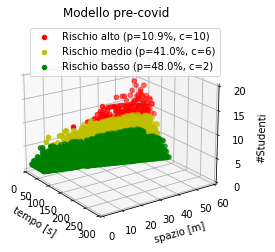

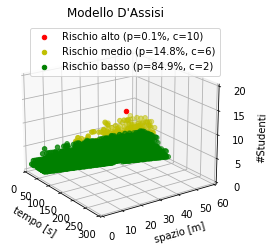

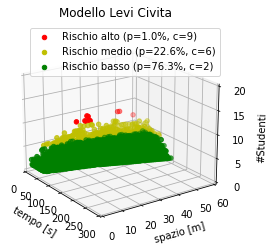

In [5]:
tit     = ['Modello pre-covid', "Modello D'Assisi",'Modello Levi Civita']
f= ['statistiche_01_no_rule.csv','statistiche_03_half.csv','statistiche_02_alternate.csv']
result=pd.DataFrame()
for ff in f:
    dd=calculate(ff)
    result=result.append(dd,ignore_index=True)

result.to_csv('result_20210528.csv',sep=';')

plot_rischio(0)
plot_rischio(1)
plot_rischio(2)